### Training models

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


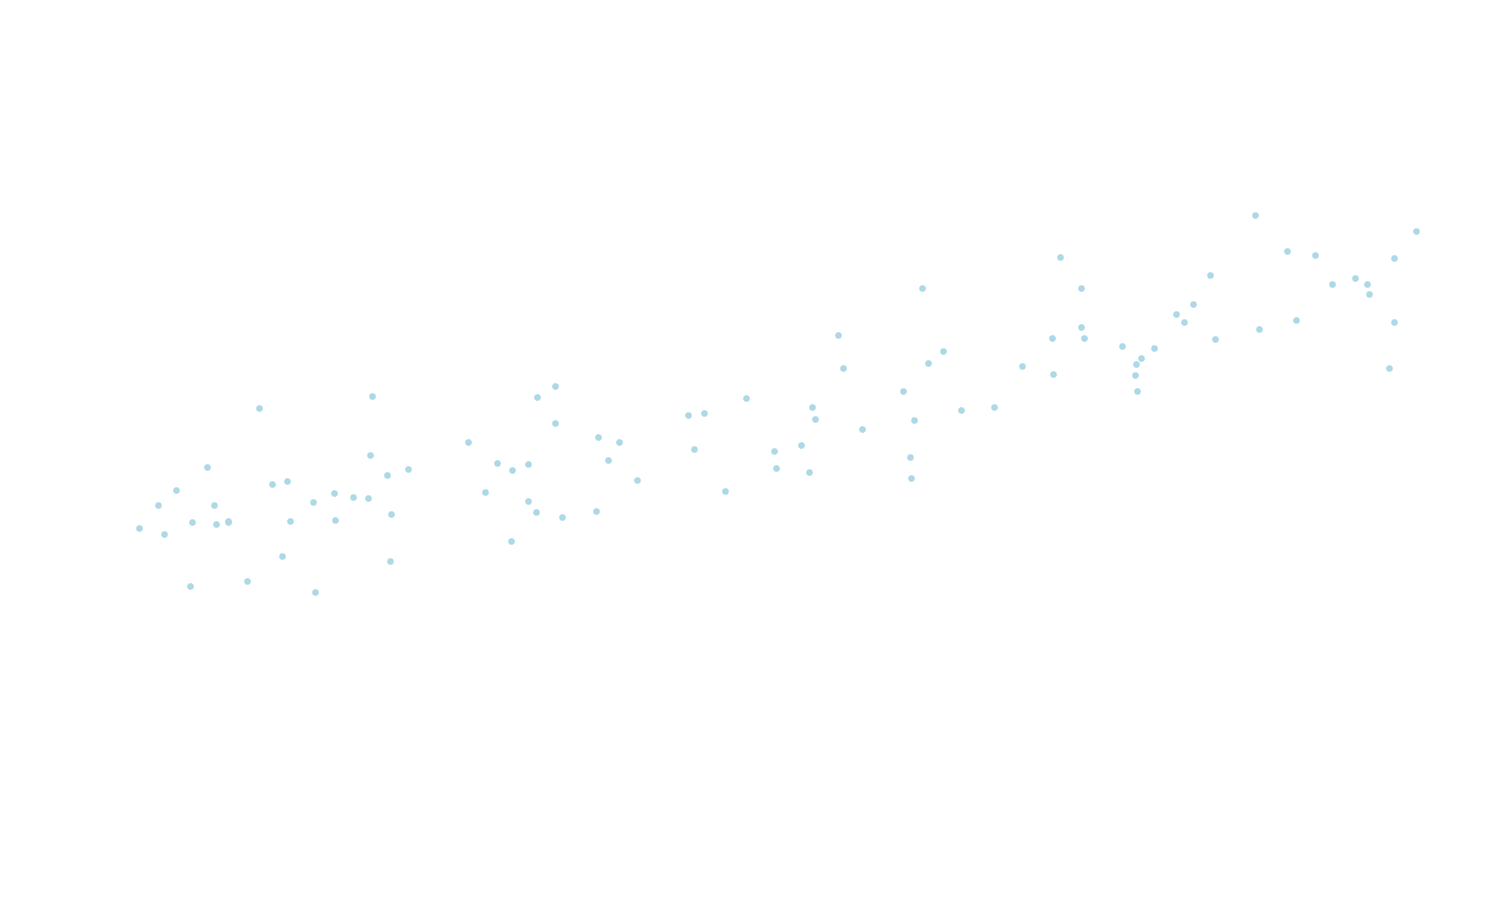

In [3]:
plt.plot(X, y, "b.", color='lightblue')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show();

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
# using the model built with theta best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

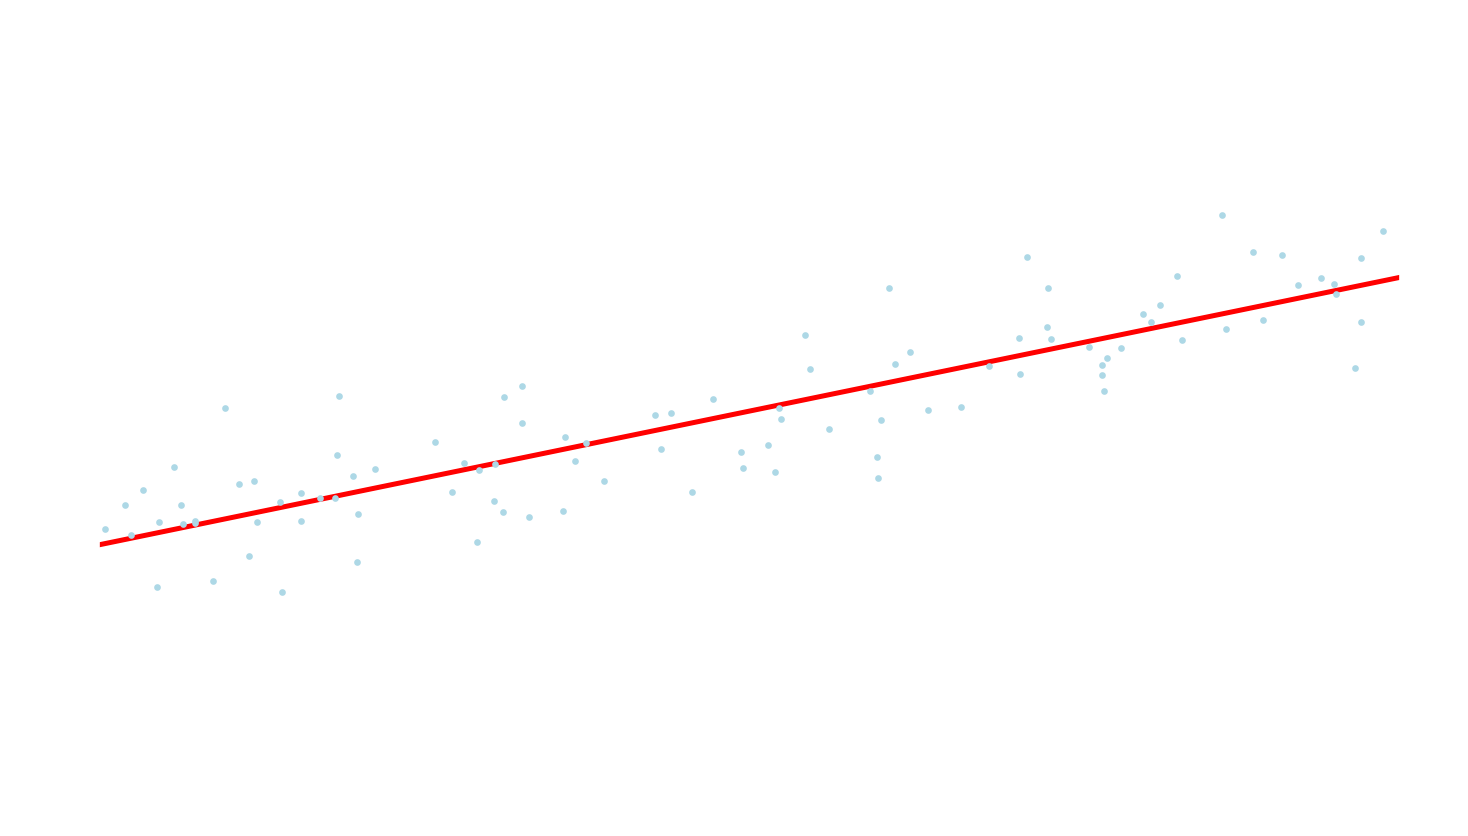

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.', color='lightblue')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients #eta = learning rate
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


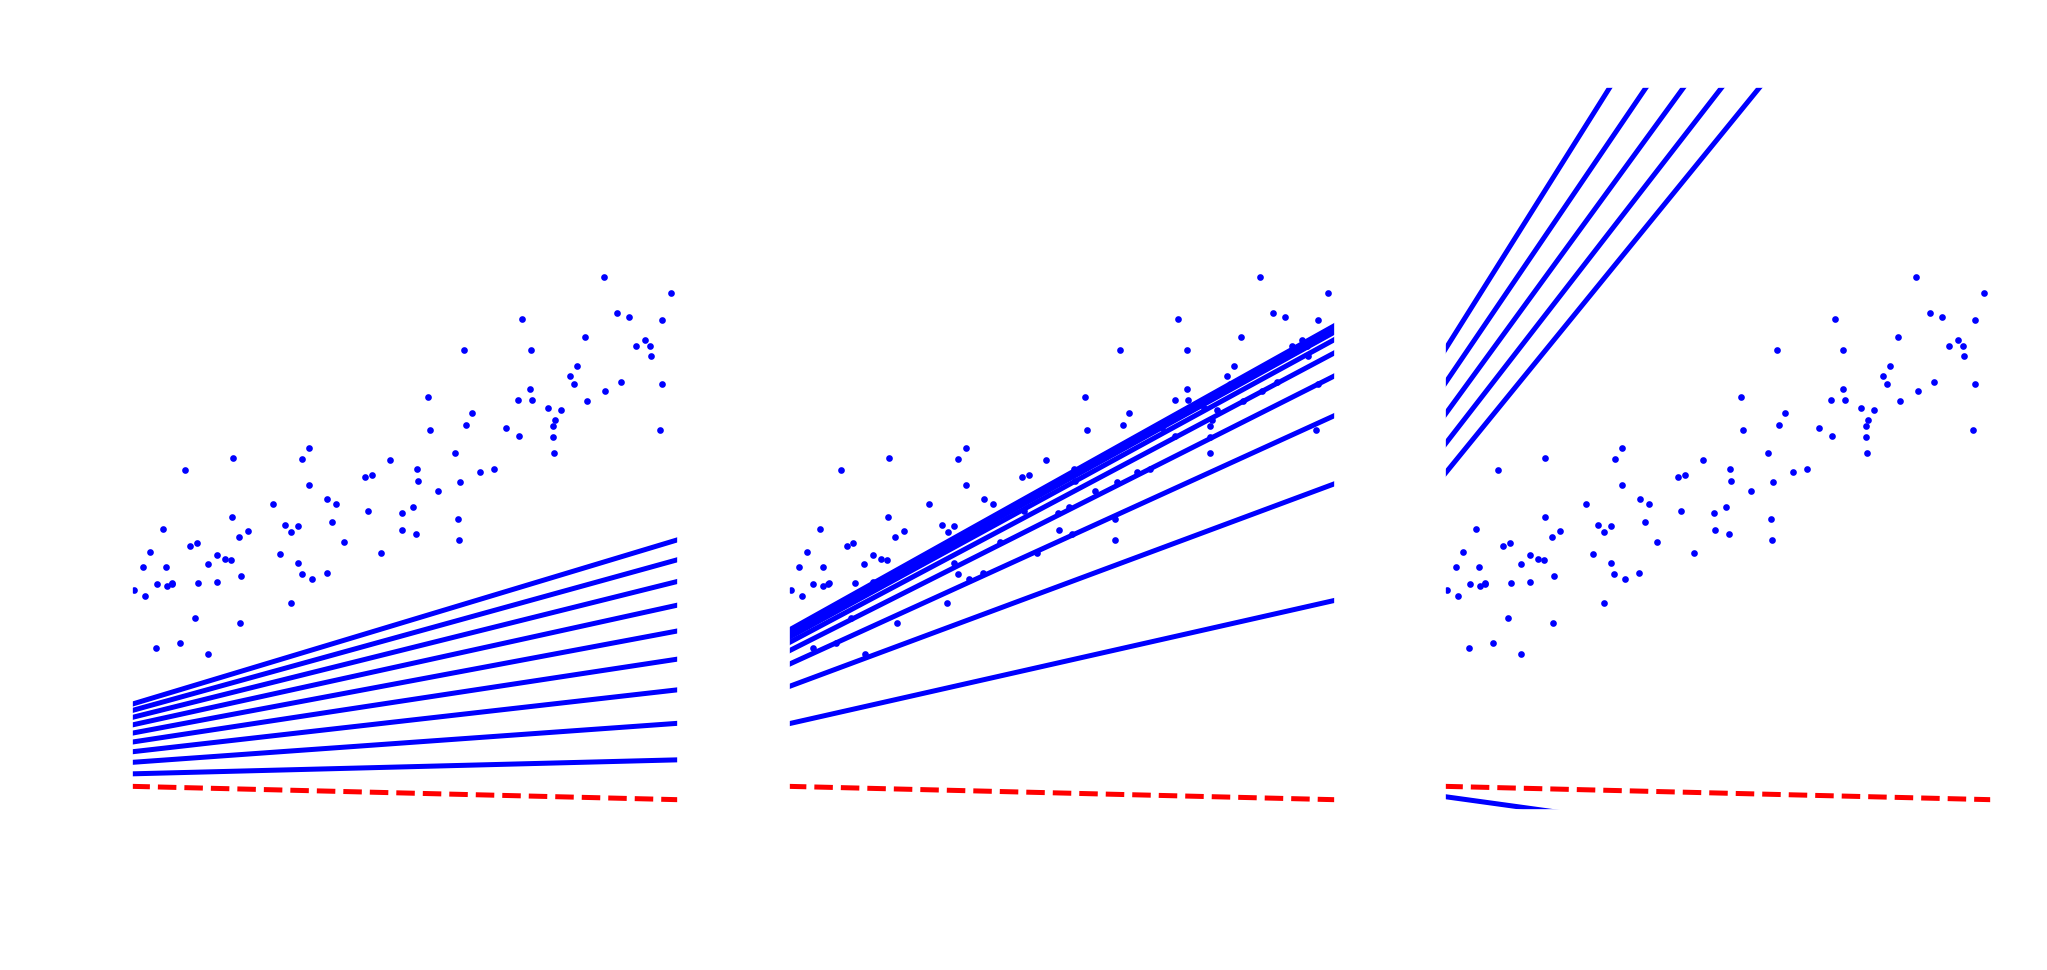

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [ ]:
# On the left, the learning rate is too low: the algorithm will eventually reach the solu‐
# tion, but it will take a long time. In the middle, the learning rate looks pretty good: in
# just a few iterations, it has already converged to the solution. On the right, the learn‐
# ing rate is too high: the algorithm diverges, jumping all over the place and actually
# getting further and further away from the solution at every step.
# To find a good learning rate, you can use grid search (see Chapter 2). However, you
# may want to limit the number of iterations so that grid search can eliminate models
# that take too long to converge.

In [ ]:
# You may wonder how to set the number of iterations. If it is too low, you will still be
# far away from the optimal solution when the algorithm stops, but if it is too high, you
# will waste time while the model parameters do not change anymore. A simple solu‐
# tion is to set a very large number of iterations but to interrupt the algorithm when the
# gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
# number ϵ (called the tolerance)—because this happens when Gradient Descent has
# (almost) reached the minimum.

In [26]:
# Eta (η) is the 7th letter of the Greek alphabe
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    #     θ**(next step) = θ − η∇θ MSE θ
    theta = theta - eta * gradients


In [27]:
theta

array([[4.21509616],
       [2.77011339]])

**Stochastic Gradient Descent**

In [13]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

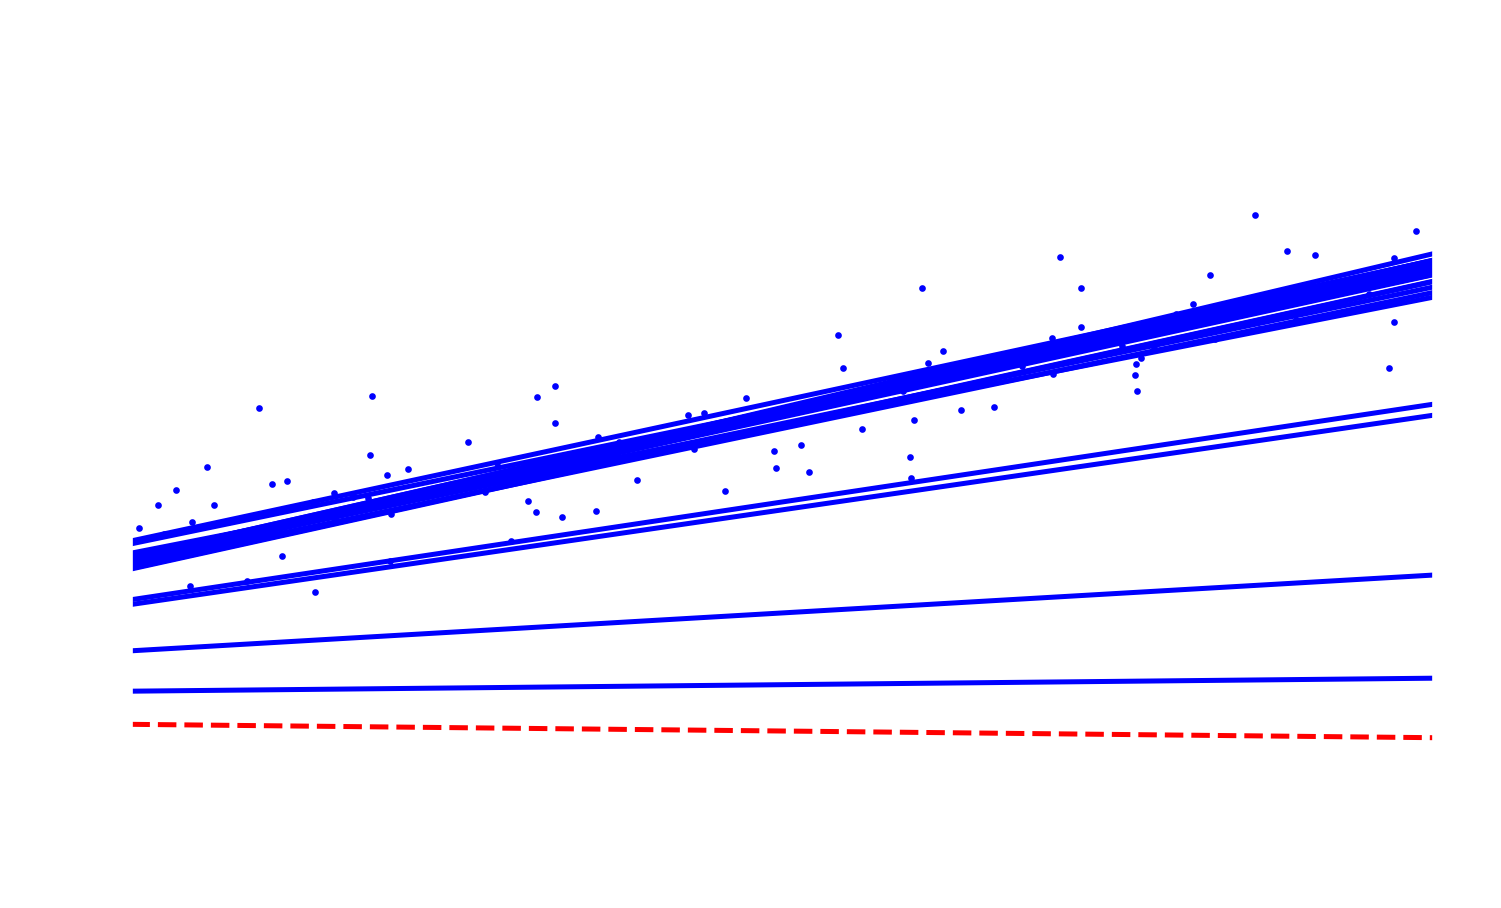

In [14]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 
# Stochastic Gradient Descent first 10 steps
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                             
plt.show()                                           

In [ ]:
# By convention we iterate by rounds of m iterations; each round is called an epoch.
# While the Batch Gradient Descent code iterated 1,000 times through the whole train‐
# ing set, this code goes through the training set only 50 times and reaches a fairly good
# solution:

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
# Note that since instances are picked randomly, some instances may be picked several
# times per epoch while others may not be picked at all. If you want to be sure that the
# algorithm goes through every instance at each epoch, another approach is to shuffle
# the training set, then go through it instance by instance, then shuffle it again, and so
# on. However, this generally converges more slowly.

In [17]:
# Stochastic Gradient Descent (Regressor)
from sklearn.linear_model import SGDRegressor
# tol the stopping criterion
# eta0 the learning rate
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

**Mini-batch Gradient Descent**

In [24]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [26]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


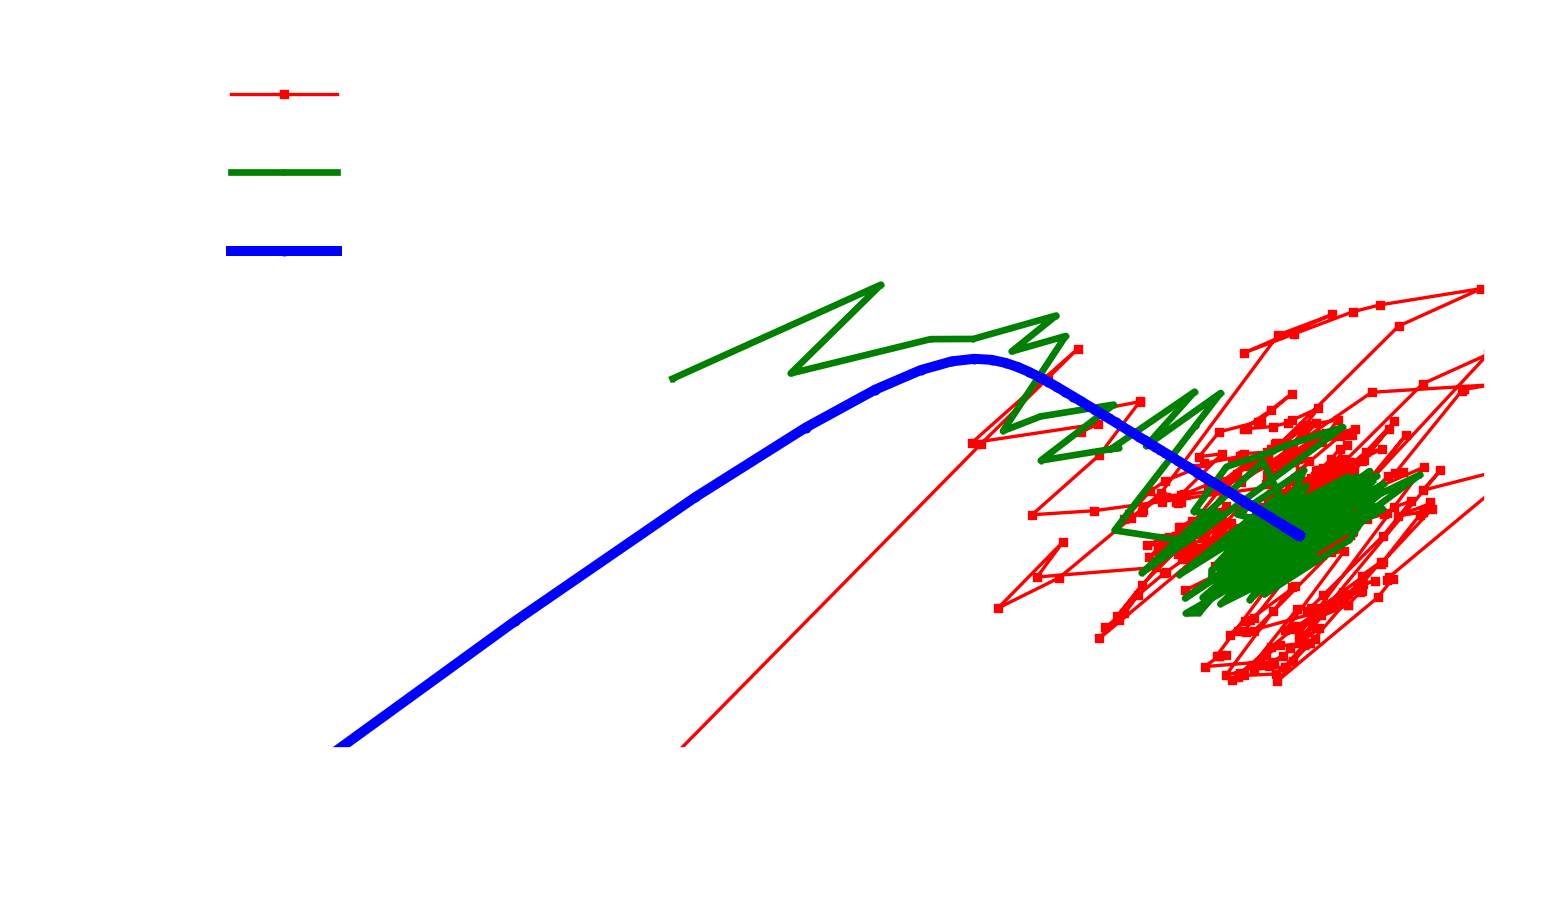

In [27]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### Polynomial Regression

In [28]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

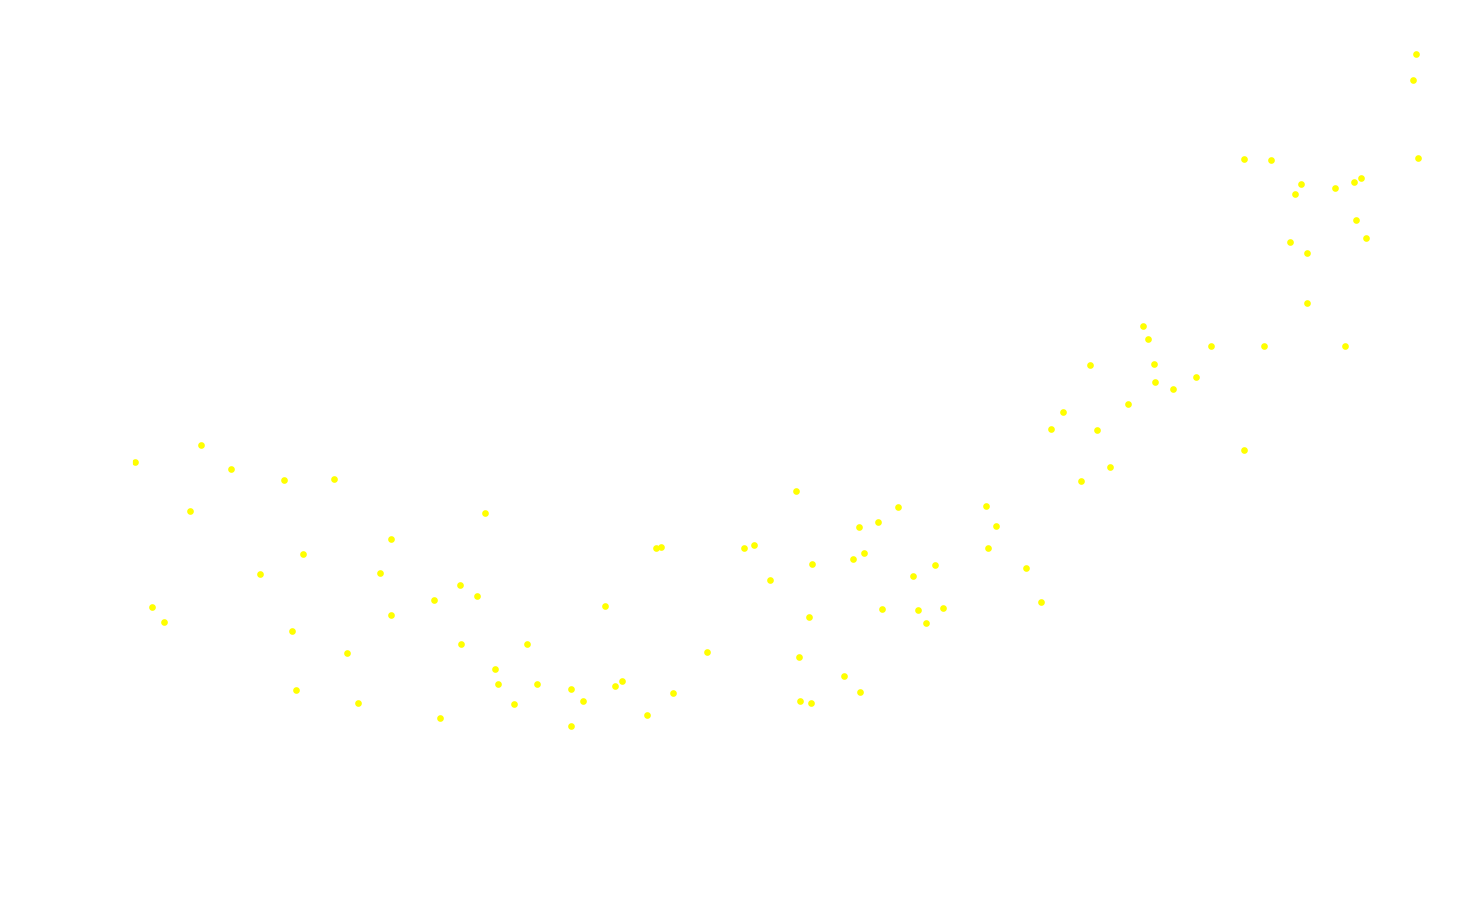

In [29]:
plt.plot(X, y, "b.", c='yellow')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [31]:
# X_poly now contains the original feature of X plus the square of this feature.
X_poly[0]

array([2.38942838, 5.709368  ])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [ ]:
# y^ = 0.52x1**2 + 0.95x2 + 1.97 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


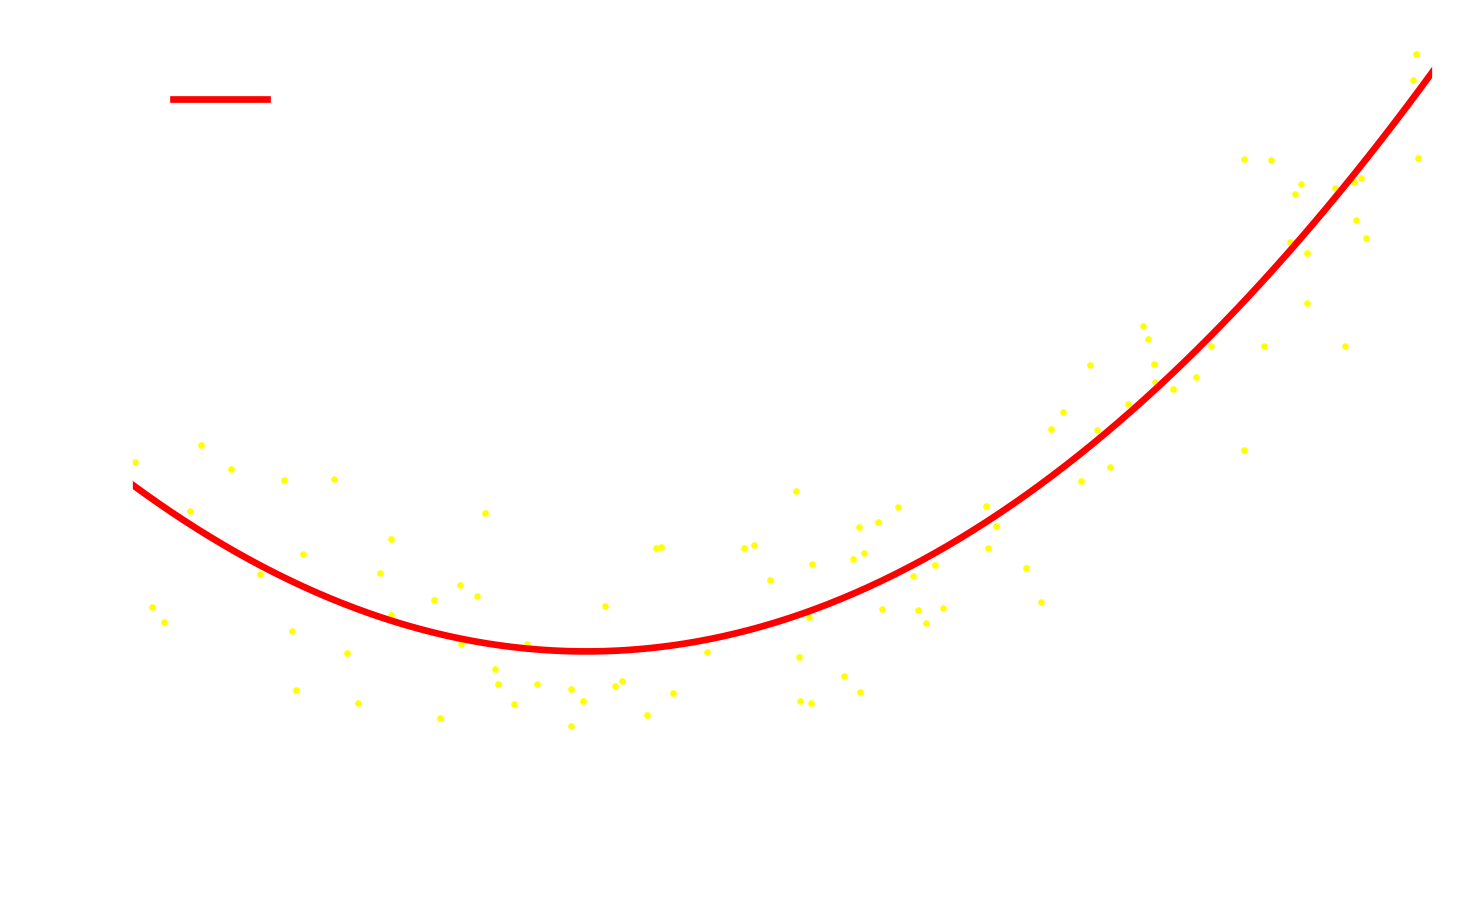

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.", c='yellow')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# Note that when there are multiple features, Polynomial Regression is capable of find‐
# ing relationships between features (which is something a plain Linear Regression
# model cannot do). This is made possible by the fact that PolynomialFeatures also
# adds all combinations of features up to the given degree. For example, if there were
# two features a and b, PolynomialFeatures with degree=3 would not only add the
# features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


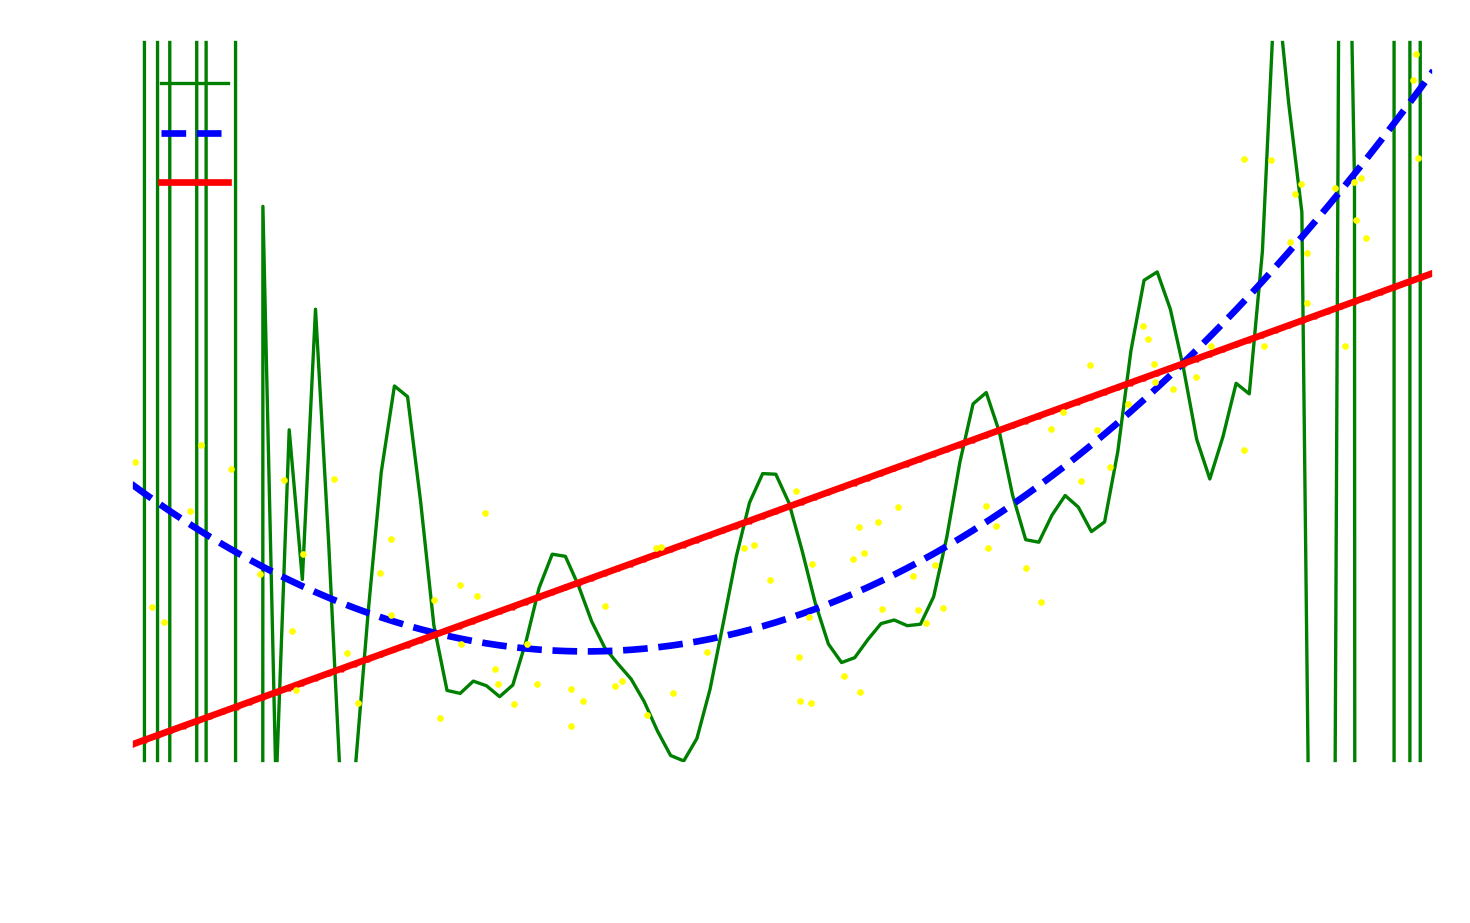

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", c='yellow', linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [35]:
# If a model performs well on the training data but generalizes poorly
# according to the cross-validation metrics, then your model is overfitting. If it per‐
# forms poorly on both, then it is underfitting. This is one way to tell when a model is
# too simple or too complex.

**Checking for overfitting and underfitting function**

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)             

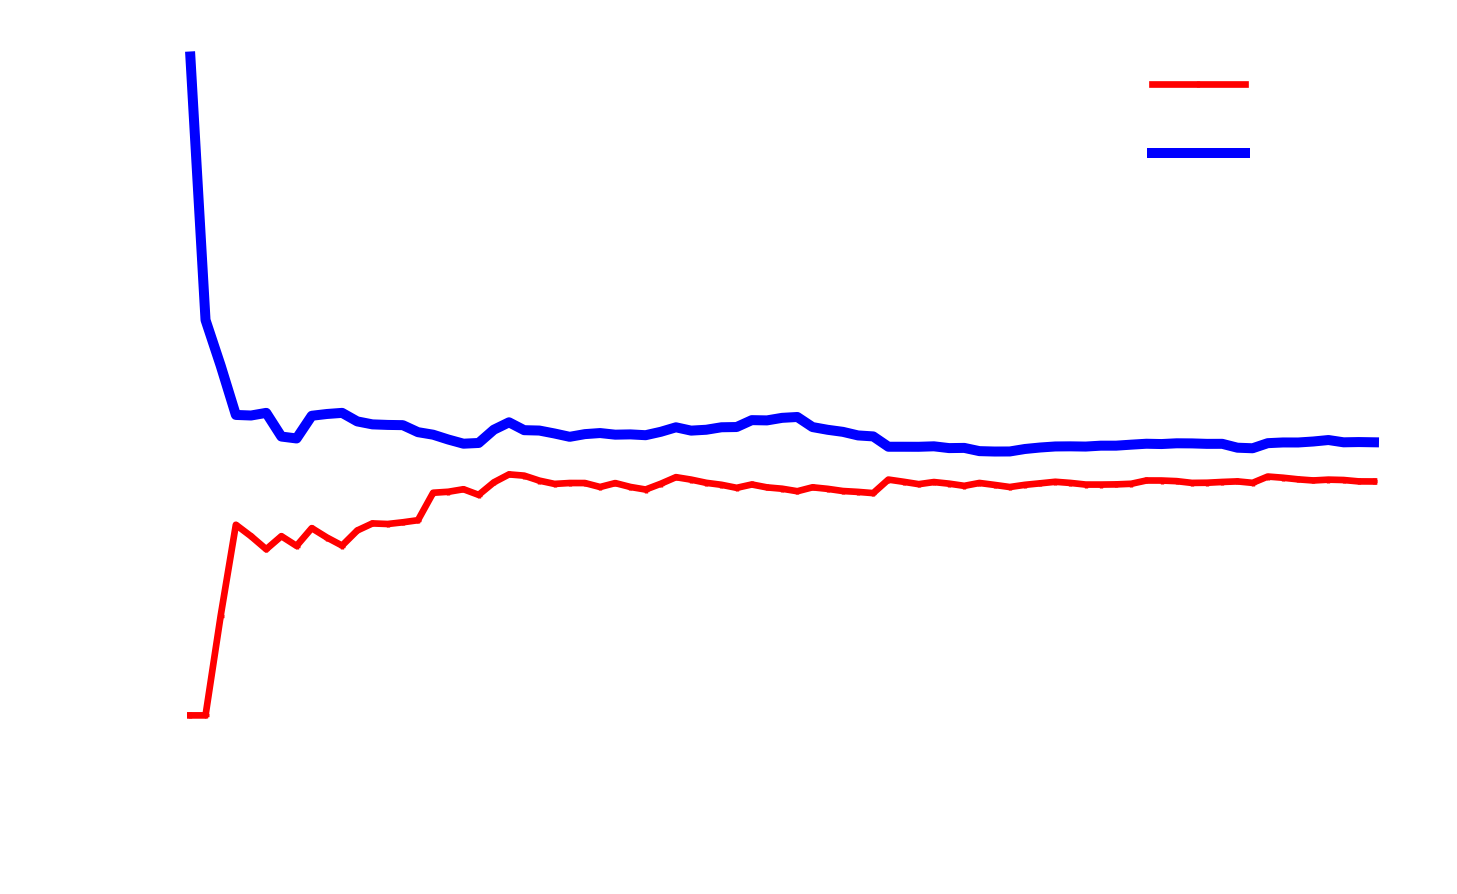

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [38]:
# First, let’s look at the performance on the training
# data: when there are just one or two instances in the training set, the model can fit
# them perfectly, which is why the curve starts at zero. But as new instances are added
# to the training set, it becomes impossible for the model to fit the training data per‐
# fectly, both because the data is noisy and because it is not linear at all. So the error on
# the training data goes up until it reaches a plateau, at which point adding new instan‐
# ces to the training set doesn’t make the average error much better or worse. Now let’s
# look at the performance of the model on the validation data. When the model is
# trained on very few training instances, it is incapable of generalizing properly, which
# is why the validation error is initially quite big. Then as the model is shown more
# training examples, it learns and thus the validation error slowly goes down. However,
# once again a straight line cannot do a good job modeling the data, so the error ends
# up at a plateau, very close to the other curve.
# These learning curves are typical of an underfitting model. Both curves have reached
# a plateau; they are close and fairly high.


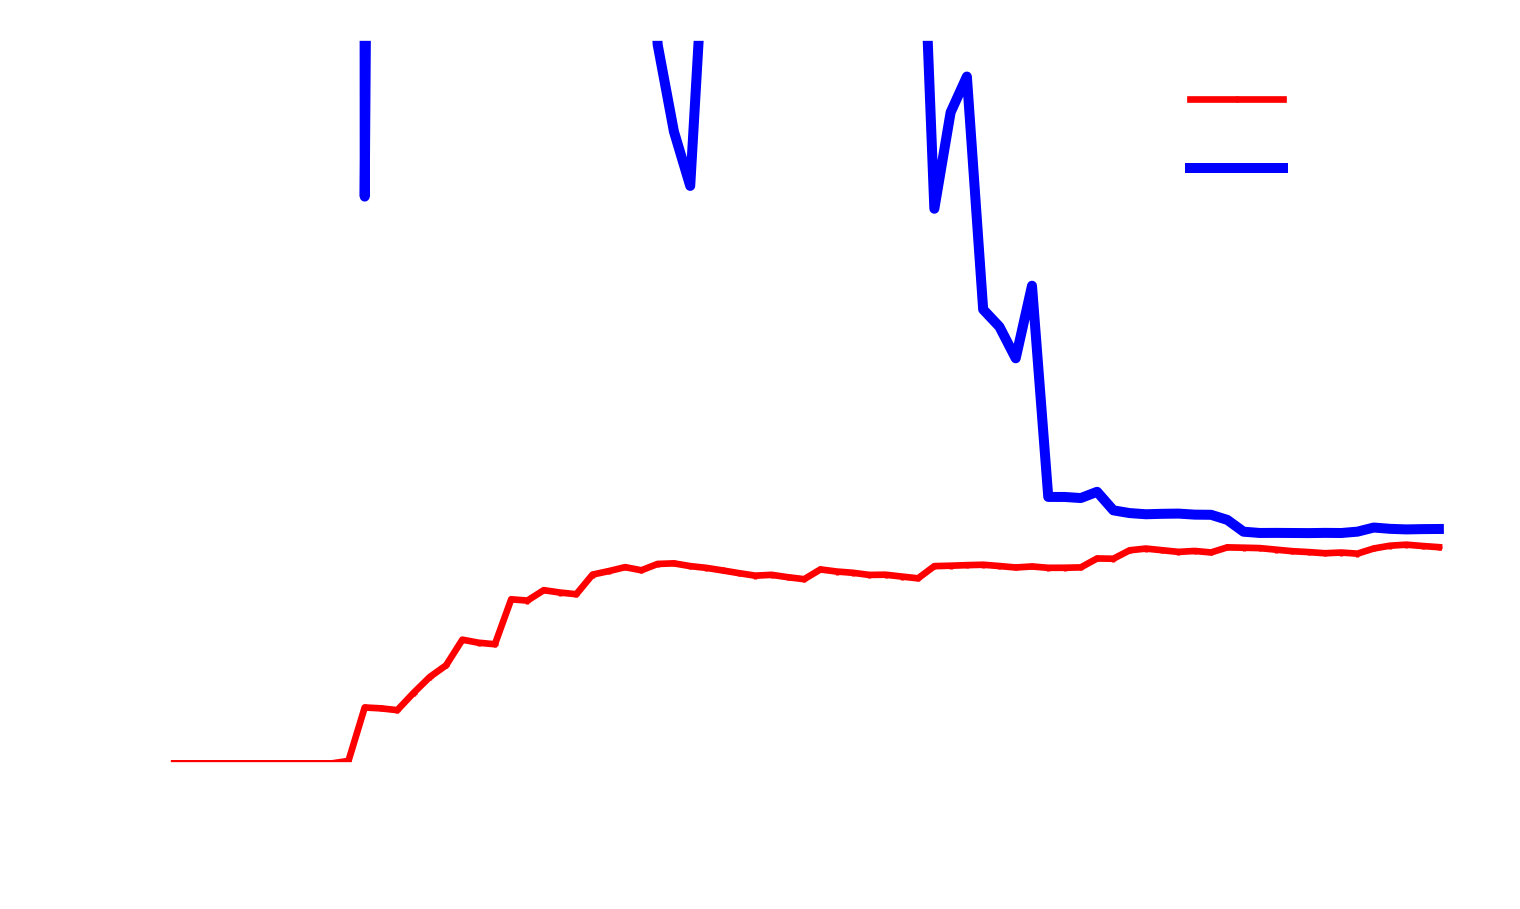

In [39]:
# 10th-degree polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

In [40]:
# There is a gap between the curves. This means that the model performs signifi‐
# cantly better on the training data than on the validation data, which is the hall‐
# mark of an overfitting model. However, if you used a much larger training set,
# the two curves would continue to get closer.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


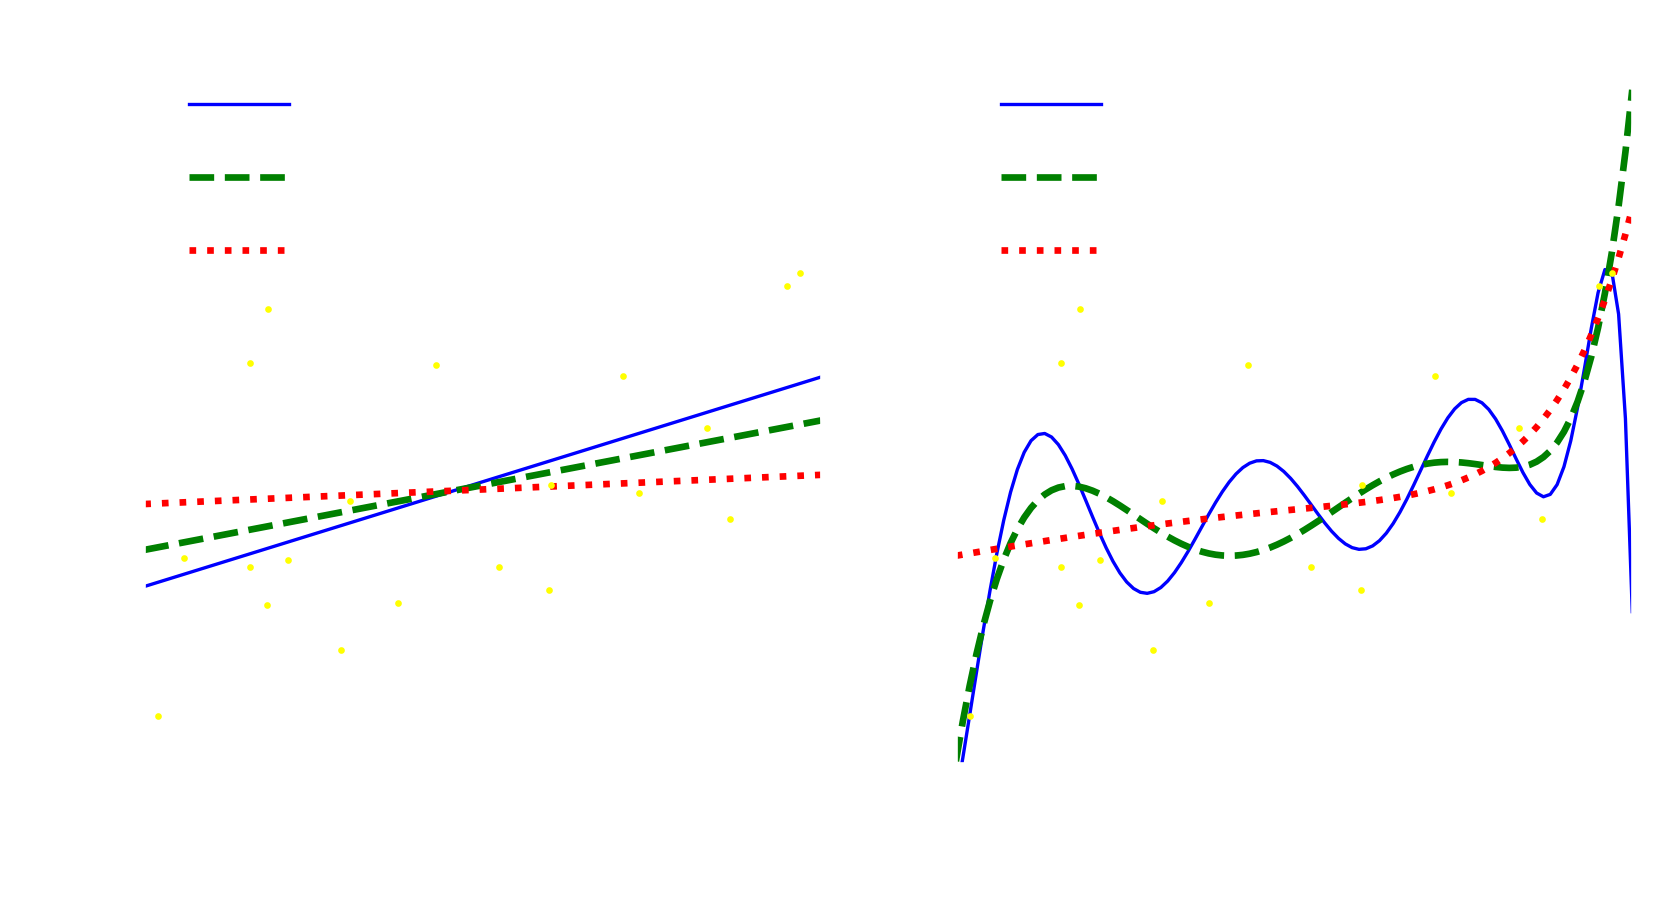

In [41]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", c='yellow',linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [42]:
# Ridge models trained on some linear data using different α
# value. On the left, plain Ridge models are used, leading to linear predictions. On the
# right, the data is first expanded using PolynomialFeatures(degree=10), then it is
# scaled using a StandardScaler, and finally the Ridge models are applied to the result‐
# ing features: this is Polynomial Regression with Ridge regularization. Note how
# increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this
# reduces the model’s variance but increases its bias.

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55071465]])

In [44]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

In [45]:
# The penalty hyperparameter sets the type of regularization term to use. Specifying
# "l2" indicates that you want SGD to add a regularization term to the cost function
# equal to half the square of the ℓ2
# norm of the weight vector: this is simply Ridge
# Regression.

**LASSO Regression**

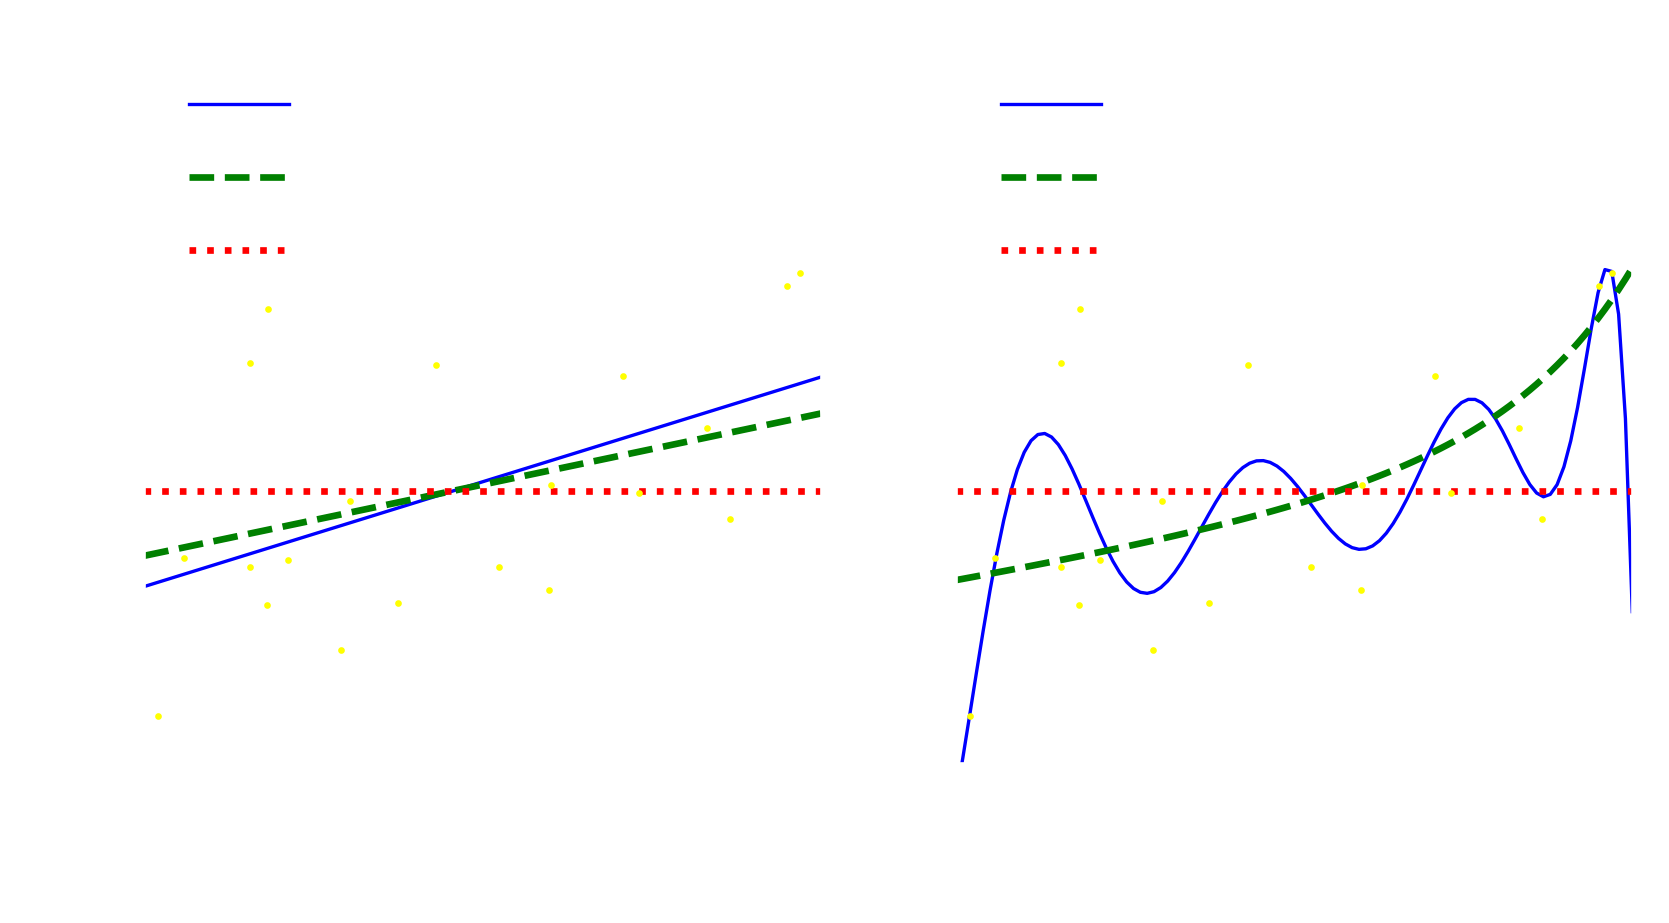

In [47]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([1.53788174])

**Elastic Net**

In [49]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [50]:
# So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost
# always preferable to have at least a little bit of regularization, so generally you should
# avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a
# few features are actually useful, you should prefer Lasso or Elastic Net since they tend
# to reduce the useless features’ weights down to zero as we have discussed. In general,
# Elastic Net is preferred over Lasso since Lasso may behave erratically when the num‐
# ber of features is greater than the number of training instances or when several fea‐
# tures are strongly correlated.

**Early Stopping**

In [ ]:
# As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
# naturally goes down, and so does its prediction error on the validation set. However,
# after a while the validation error stops decreasing and actually starts to go back up.
# This indicates that the model has started to overfit the training data

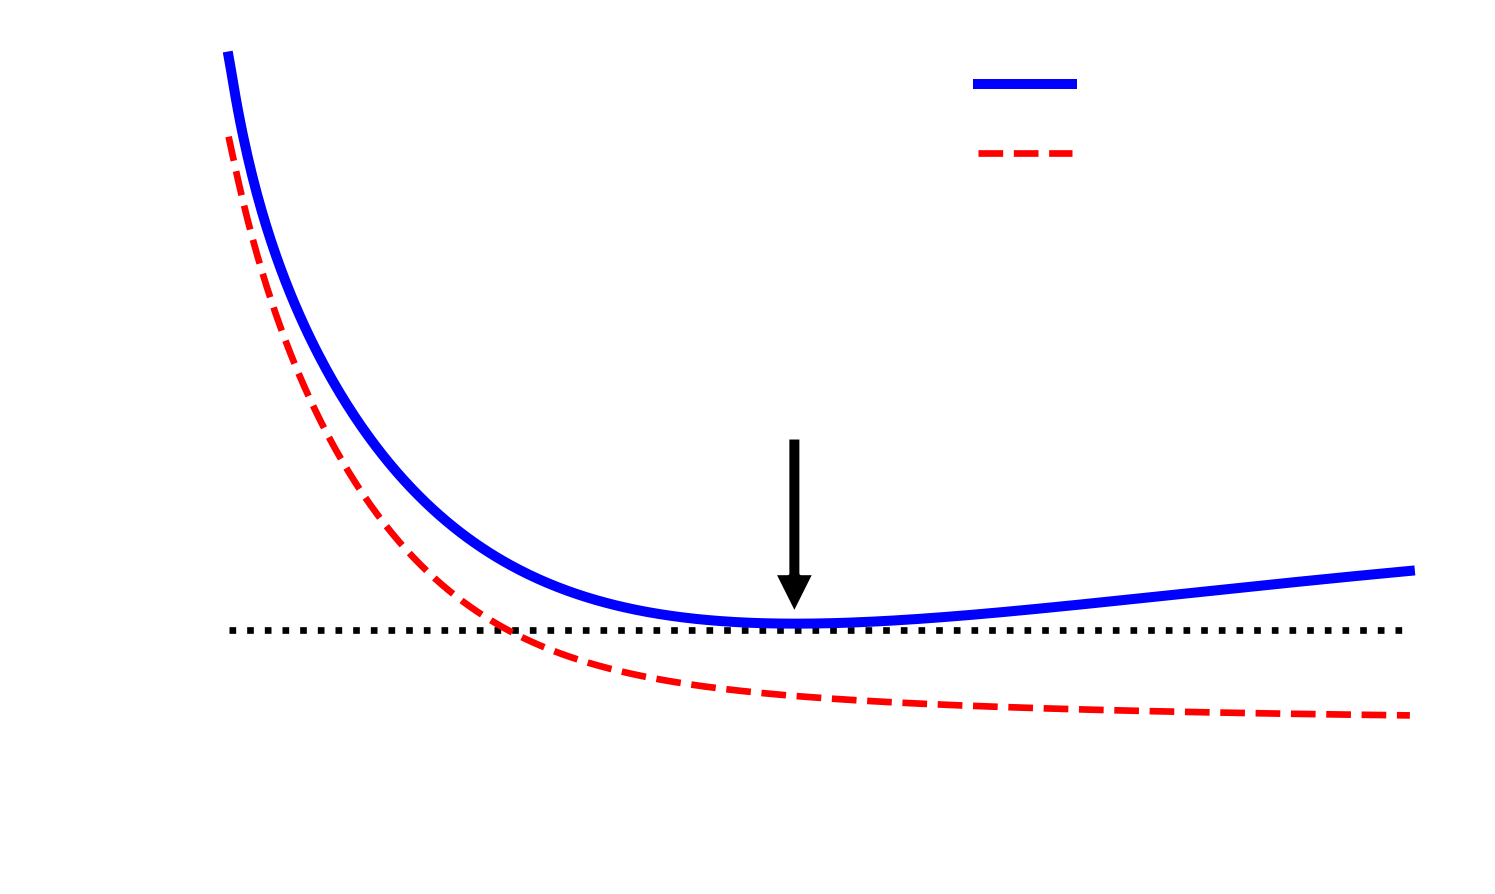

In [52]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [55]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    

In [56]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [57]:
# Note that with warm_start=True, when the fit() method is called, it just continues
# training where it left off instead of restarting from scratch

### Logistic Regression

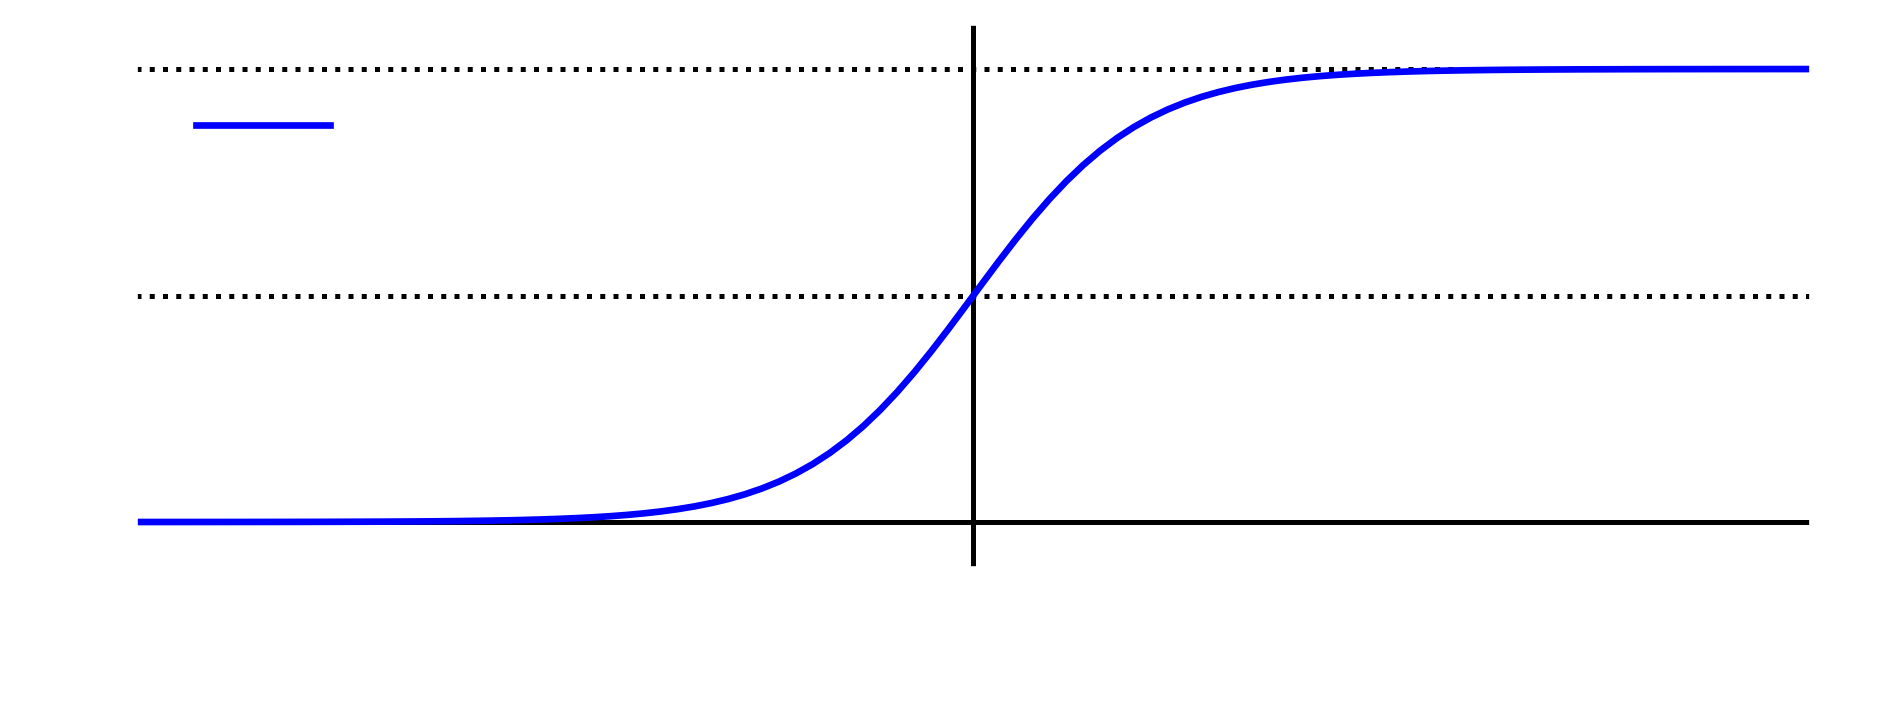

In [58]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [63]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

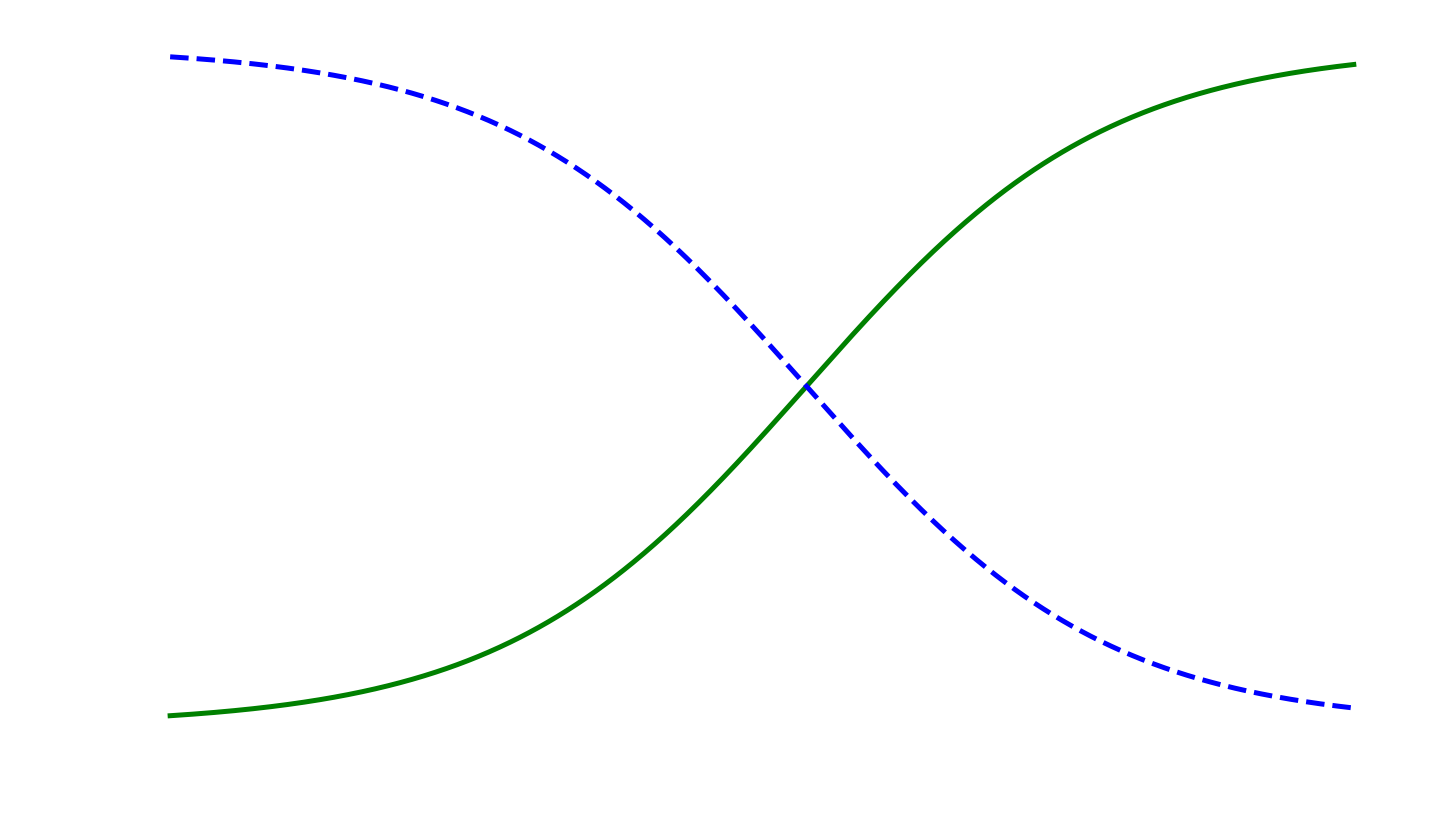

In [67]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')


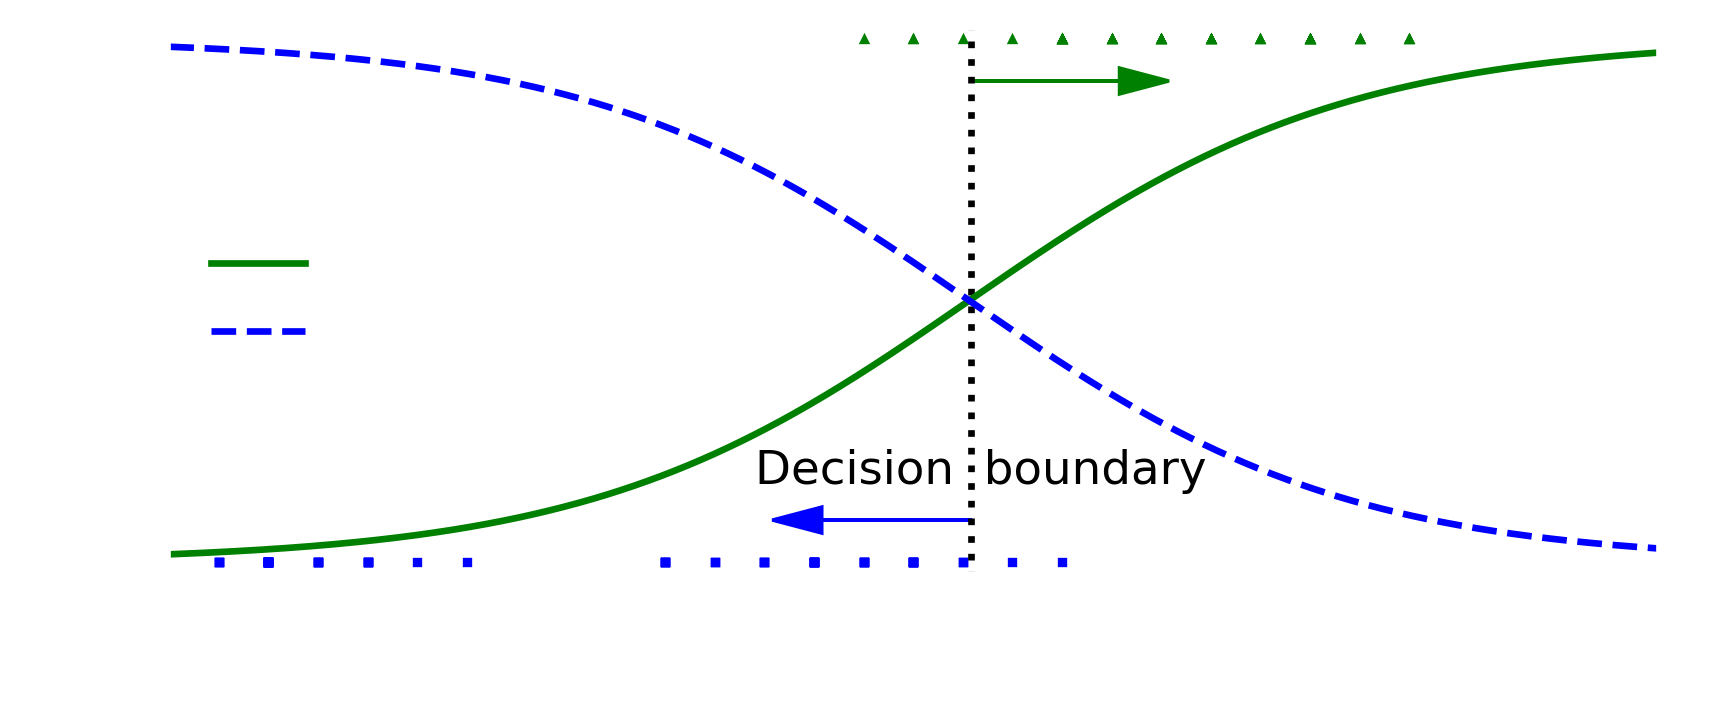

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [72]:
decision_boundary

array([1.61561562])

In [70]:
# The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
# cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
# smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of over‐
# lap. Above about 2 cm the classifier is highly confident that the flower is an IrisVirginica
# (it outputs a high probability to that class), while below 1 cm it is highly
# confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
# class). In between these extremes, the classifier is unsure. However, if you ask it to
# predict the class (using the predict() method rather than the predict_proba()
# method), it will return whichever class is the most likely. Therefore, there is a decision
# boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
# width is higher than 1.6 cm, the classifier will predict that the flower is an IrisVirginica, or
# else it will predict that it is not (even if it is not very confident):

In [71]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

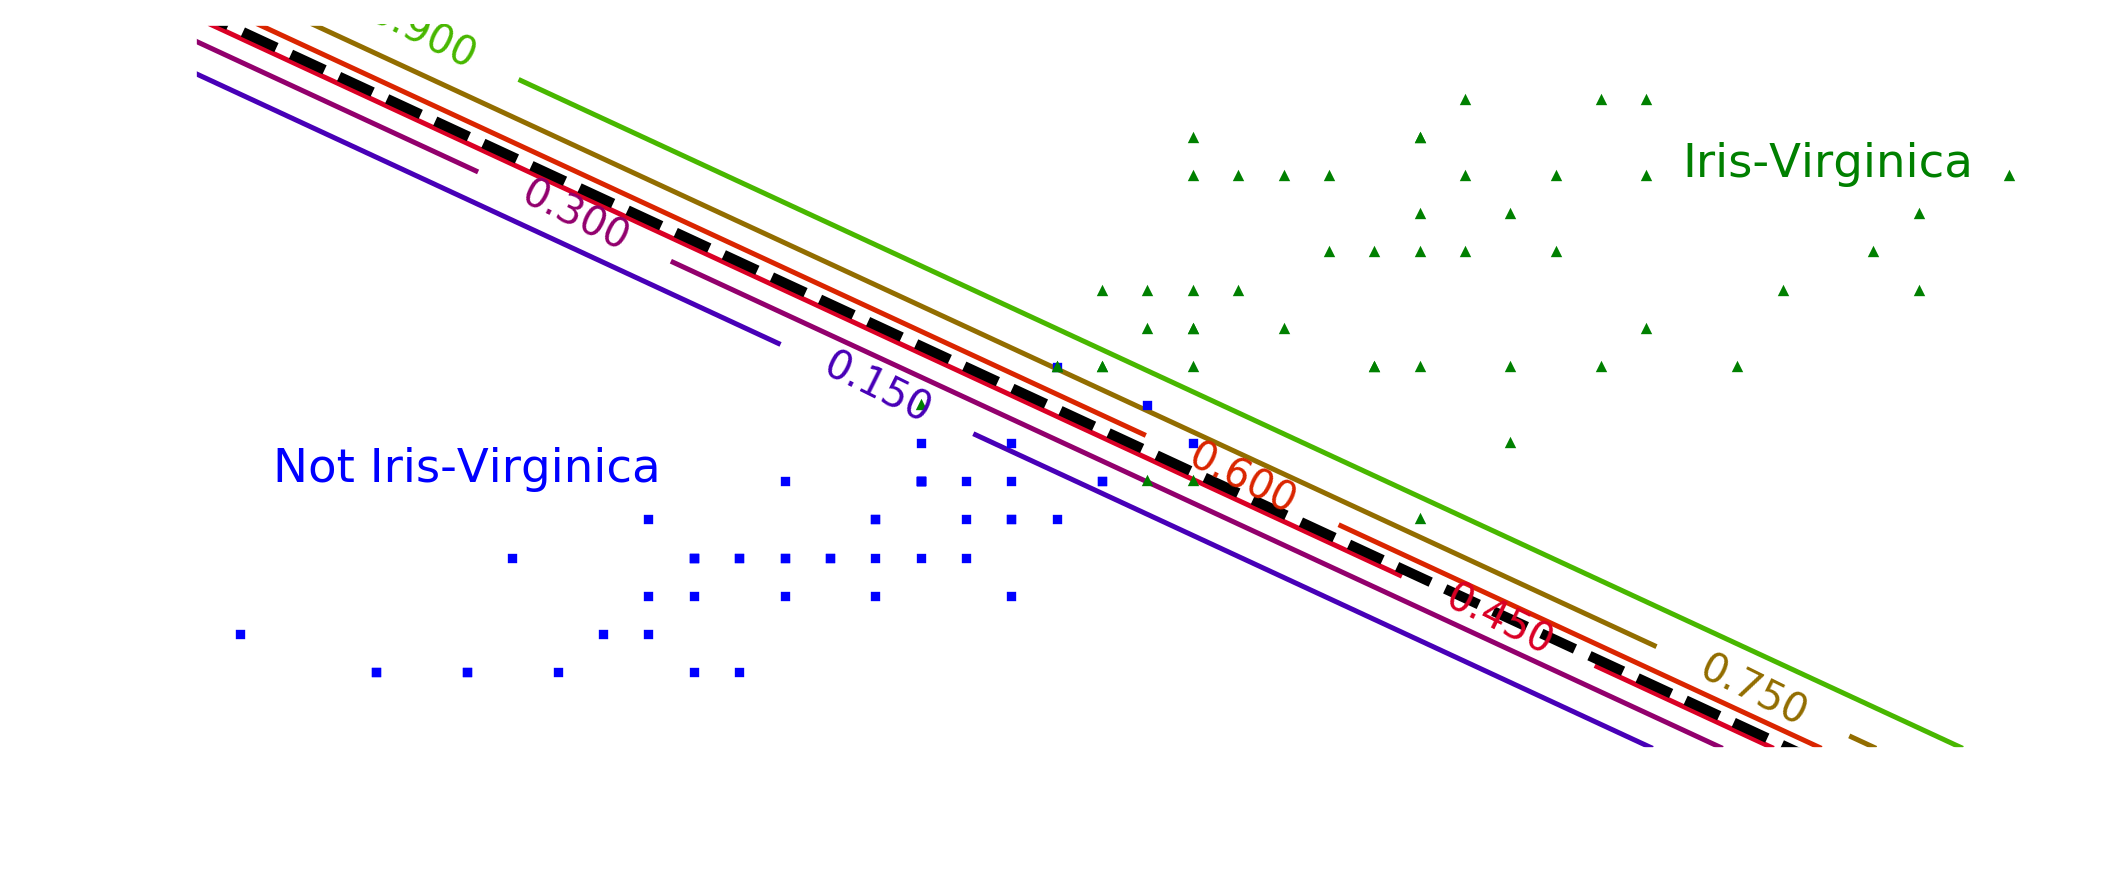

In [73]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

**Softmax Regerssion**

In [ ]:
# Now that you know how the model estimates probabilities and makes predictions,
# let’s take a look at training. The objective is to have a model that estimates a high
# probability for the target class (and consequently a low probability for the other
# classes). Minimizing the cost function shown in Equation 4-22, called the cross
# entropy, should lead to this objective because it penalizes the model when it estimates
# a low probability for a target class. Cross entropy is frequently used to measure how
# well a set of estimated class probabilities match the target classes (we will use it again
# several times in the following chapters).

In [75]:
# Let’s use Softmax Regression to classify the iris flowers into all three classes. ScikitLearn’s LogisticRegression uses one-versus-all by default when you train it on more
# than two classes, but you can set the multi_class hyperparameter to "multinomial"
# to switch it to Softmax Regression instead. You must also specify a solver that sup‐
# ports Softmax Regression, such as the "lbfgs" solver It also applies ℓ2
#  regularization by default, which you can control using the hyperparameter C.
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
# So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask
# your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2)
# with 94.2% probability (or Iris-Versicolor with 5.8% probability):
softmax_reg.predict([[5,2]])


array([2])

In [78]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [79]:
# The resulting decision boundaries, represented by the background
# colors. Notice that the decision boundaries between any two classes are linear. The
# figure also shows the probabilities for the Iris-Versicolor class, represented by the
# curved lines (e.g., the line labeled with 0.450 represents the 45% probability bound‐
# ary). Notice that the model can predict a class that has an estimated probability below
# 50%. For example, at the point where all decision boundaries meet, all classes have an
# equal estimated probability of 33%.

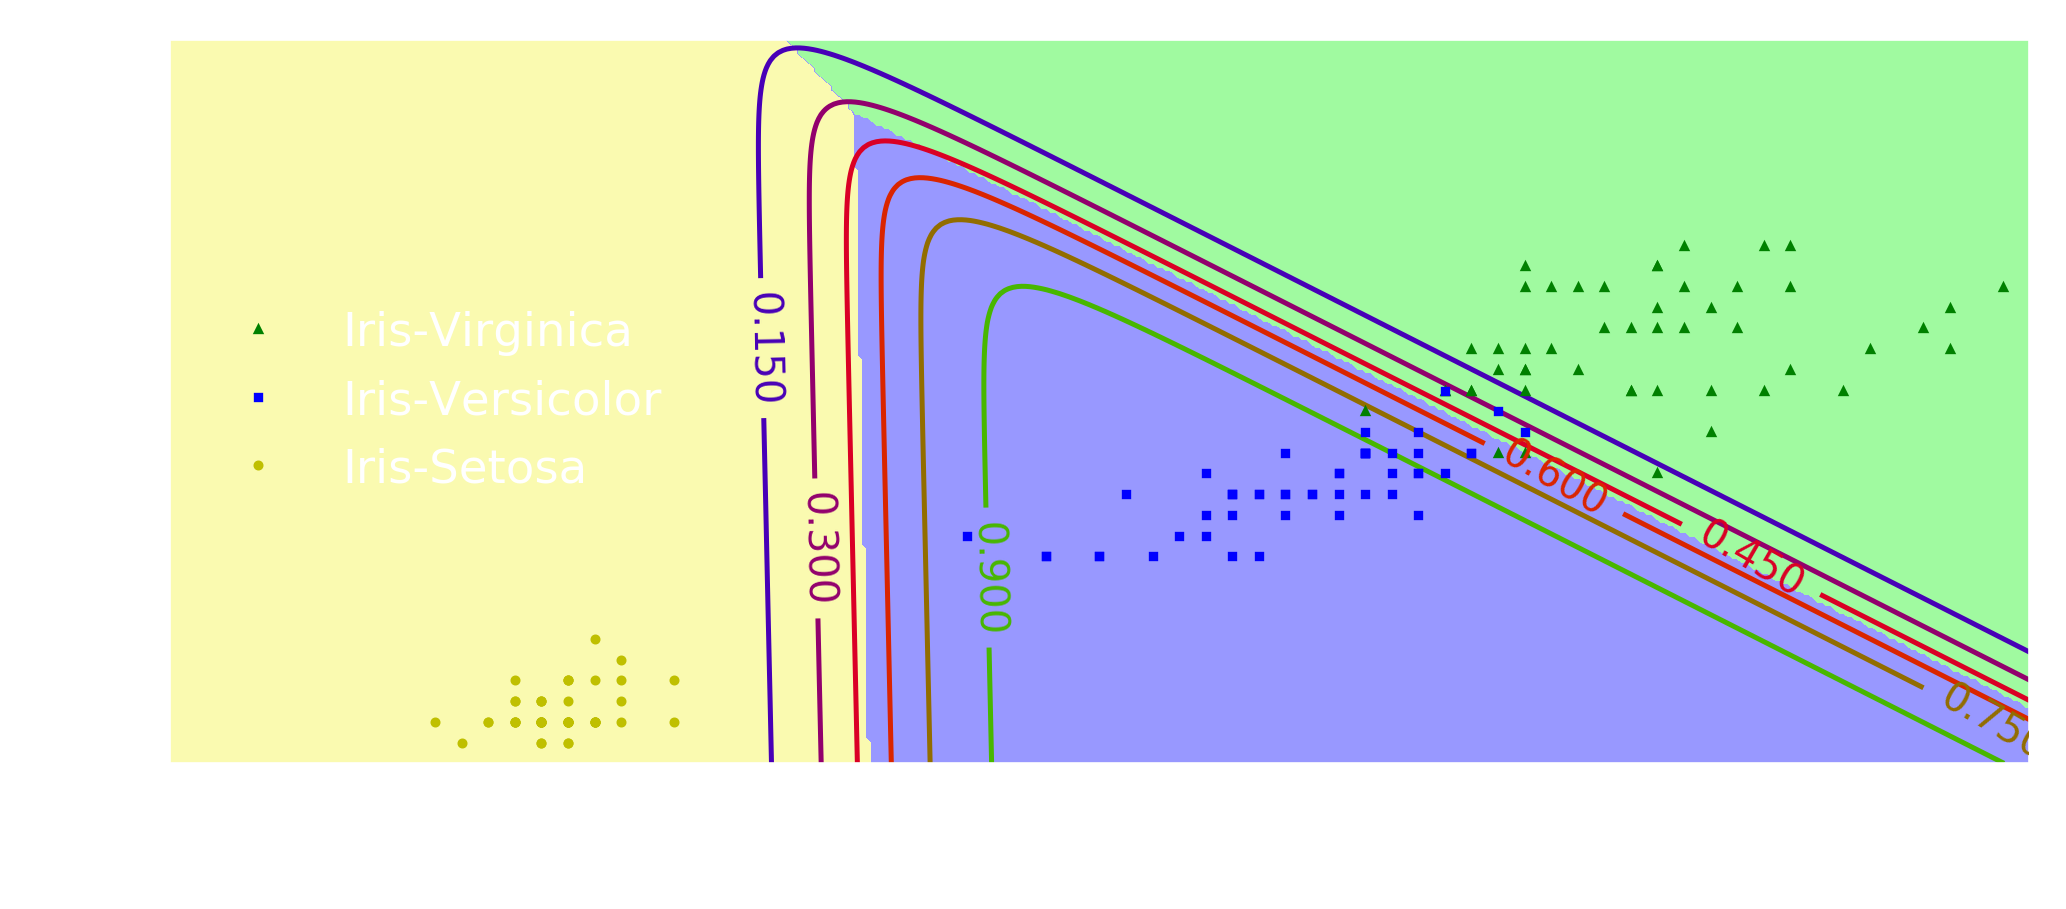

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

1. Exercises

In [ ]:
# 1. What Linear Regression training algorithm can you use if you have a training set
# with millions of features?
#     If you have a training set with millions of features you can use Stochastic Gradi‐
# ent Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient
# Descent if the training set fits in memory. But you cannot use the Normal Equa‐
# tion because the computational complexity grows quickly (more than quadrati‐
# cally) with the number of features.

# 2. Suppose the features in your training set have very different scales. What algo‐
# rithms might suffer from this, and how? What can you do about it?
#     If the features in your training set have very different scales, the cost function will
# have the shape of an elongated bowl, so the Gradient Descent algorithms will take
# a long time to converge. To solve this you should scale the data before training
# the model. Note that the Normal Equation will work just fine without scaling.

# 3. Can Gradient Descent get stuck in a local minimum when training a Logistic
# Regression model?
#     Gradient Descent cannot get stuck in a local minimum when training a Logistic
# Regression model because the cost function is convex.1

# 4. Do all Gradient Descent algorithms lead to the same model provided you let
# them run long enough?
# If the optimization problem is convex (such as Linear Regression or Logistic
# Regression), and assuming the learning rate is not too high, then all Gradient
# Descent algorithms will approach the global optimum and end up producing
# fairly similar models. However, unless you gradually reduce the learning rate,
# Stochastic GD and Mini-batch GD will never truly converge; instead, they will
# keep jumping back and forth around the global optimum. This means that even
# if you let them run for a very long time, these Gradient Descent algorithms will
# produce slightly different models.

# 5. Suppose you use Batch Gradient Descent and you plot the validation error at
# every epoch. If you notice that the validation error consistently goes up, what is
# likely going on? How can you fix this?
# If the validation error consistently goes up after every epoch, then one possibility
# is that the learning rate is too high and the algorithm is diverging. If the training
# error also goes up, then this is clearly the problem and you should reduce the
# learning rate. However, if the training error is not going up, then your model is
# overfitting the training set and you should stop training.

# 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the vali‐
# dation error goes up?
# Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch
# Gradient Descent is guaranteed to make progress at every single training itera‐
# tion. So if you immediately stop training when the validation error goes up, you
# may stop much too early, before the optimum is reached. A better option is to
# save the model at regular intervals, and when it has not improved for a long time
# (meaning it will probably never beat the record), you can revert to the best saved
# model

# 7. Which Gradient Descent algorithm (among those we discussed) will reach the
# vicinity of the optimal solution the fastest? Which will actually converge? How
# can you make the others converge as well?
# Stochastic Gradient Descent has the fastest training iteration since it considers
# only one training instance at a time, so it is generally the first to reach the vicinity
# of the global optimum (or Mini-batch GD with a very small mini-batch size).
# However, only Batch Gradient Descent will actually converge, given enough
# training time. As mentioned, Stochastic GD and Mini-batch GD will bounce
# around the optimum, unless you gradually reduce the learning rate.

# 8. Suppose you are using Polynomial Regression. You plot the learning curves and
# you notice that there is a large gap between the training error and the validation
# error. What is happening? What are three ways to solve this?
# If the validation error is much higher than the training error, this is likely because
# your model is overfitting the training set. One way to try to fix this is to reduce
# the polynomial degree: a model with fewer degrees of freedom is less likely to
# overfit. Another thing you can try is to regularize the model—for example, by
# adding an ℓ2  penalty (Ridge) or an ℓ1 penalty (Lasso) to the cost function. This
# will also reduce the degrees of freedom of the model. Lastly, you can try to
# increase the size of the training set.

# 9. Suppose you are using Ridge Regression and you notice that the training error
# and the validation error are almost equal and fairly high. Would you say that the
# model suffers from high bias or high variance? Should you increase the regulari‐
# zation hyperparameter α or reduce it?
# If both the training error and the validation error are almost equal and fairly
# high, the model is likely underfitting the training set, which means it has a high
# bias. You should try reducing the regularization hyperparameter α.

# 10. Why would you want to use:
# • Ridge Regression instead of Linear Regression?
#     A model with some regularization typically performs better than a model
# without any regularization, so you should generally prefer Ridge Regression
# over plain Linear Regression

# • Lasso instead of Ridge Regression?
# Lasso Regression uses an ℓ1 penalty, which tends to push the weights down to
# exactly zero. This leads to sparse models, where all weights are zero except for
# the most important weights. This is a way to perform feature selection auto‐
# matically, which is good if you suspect that only a few features actually matter.
# When you are not sure, you should prefer Ridge Regression

# • Elastic Net instead of Lasso?
# Elastic Net is generally preferred over Lasso since Lasso may behave erratically
# in some cases (when several features are strongly correlated or when there are
# more features than training instances). However, it does add an extra hyper‐
# parameter to tune. If you just want Lasso without the erratic behavior, you can
# just use Elastic Net with an l1_ratio close to 1.

# 11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.
# Should you implement two Logistic Regression classifiers or one Softmax Regres‐
# sion classifier?
# If you want to classify pictures as outdoor/indoor and daytime/nighttime, since
# these are not exclusive classes (i.e., all four combinations are possible) you should
# train two Logistic Regression classifiers.


In [88]:
# 12. Implement Batch Gradient Descent with early stopping for Softmax Regression
# (without using Scikit-Learn).

X = iris['data'][:, (2,3)]
y = iris['target']

In [90]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

In [91]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [92]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [94]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [95]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

**Softmax Equation**

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [96]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [98]:
n_inputs = X_train.shape[1] # == 3 (2 features the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)

**Cost function**

$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

**Equation for gradients**

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

In [101]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.173284880908112
500 0.8258143504756524
1000 0.6740383508681776
1500 0.5891518016822946
2000 0.5353052890403674
2500 0.4975988211901051
3000 0.469220320068328
3500 0.4467104744290491
4000 0.4281482798645294
4500 0.4123865613153482
5000 0.3986986115898958


In [102]:
Theta

array([[ 2.96506788, -1.31523785, -2.75290651],
       [-0.37388472,  1.16174385,  0.478946  ],
       [-1.0446009 , -0.97856165,  2.04772298]])

In [103]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above,
but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional
term (note that we don't regularize the first element of Theta since this corresponds to the bias term).
Also, let's try increasing the learning rate eta.

In [104]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.038280239064085
500 0.532220182252098
1000 0.5035315271928776
1500 0.49465903889629925
2000 0.49128501840330063
2500 0.4898942482434113
3000 0.48929688012374906
3500 0.4890341569337251
4000 0.4889169279611999
4500 0.4888641374714865
5000 0.488840222941224


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier

In [105]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [106]:
# Now let's add early stopping. For this we just need to measure the loss on the validation set at
# every iteration and stop when the error starts growing.
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break


0 2.897275838876366
500 0.5702751662442892
1000 0.5425654873413586
1500 0.5353090385301479
2000 0.5331256731252507
2500 0.5325827330917429
2736 0.5325454243382794
2737 0.532545425210158 early stopping!


In [107]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [ ]:
# Still perfect, but faster.

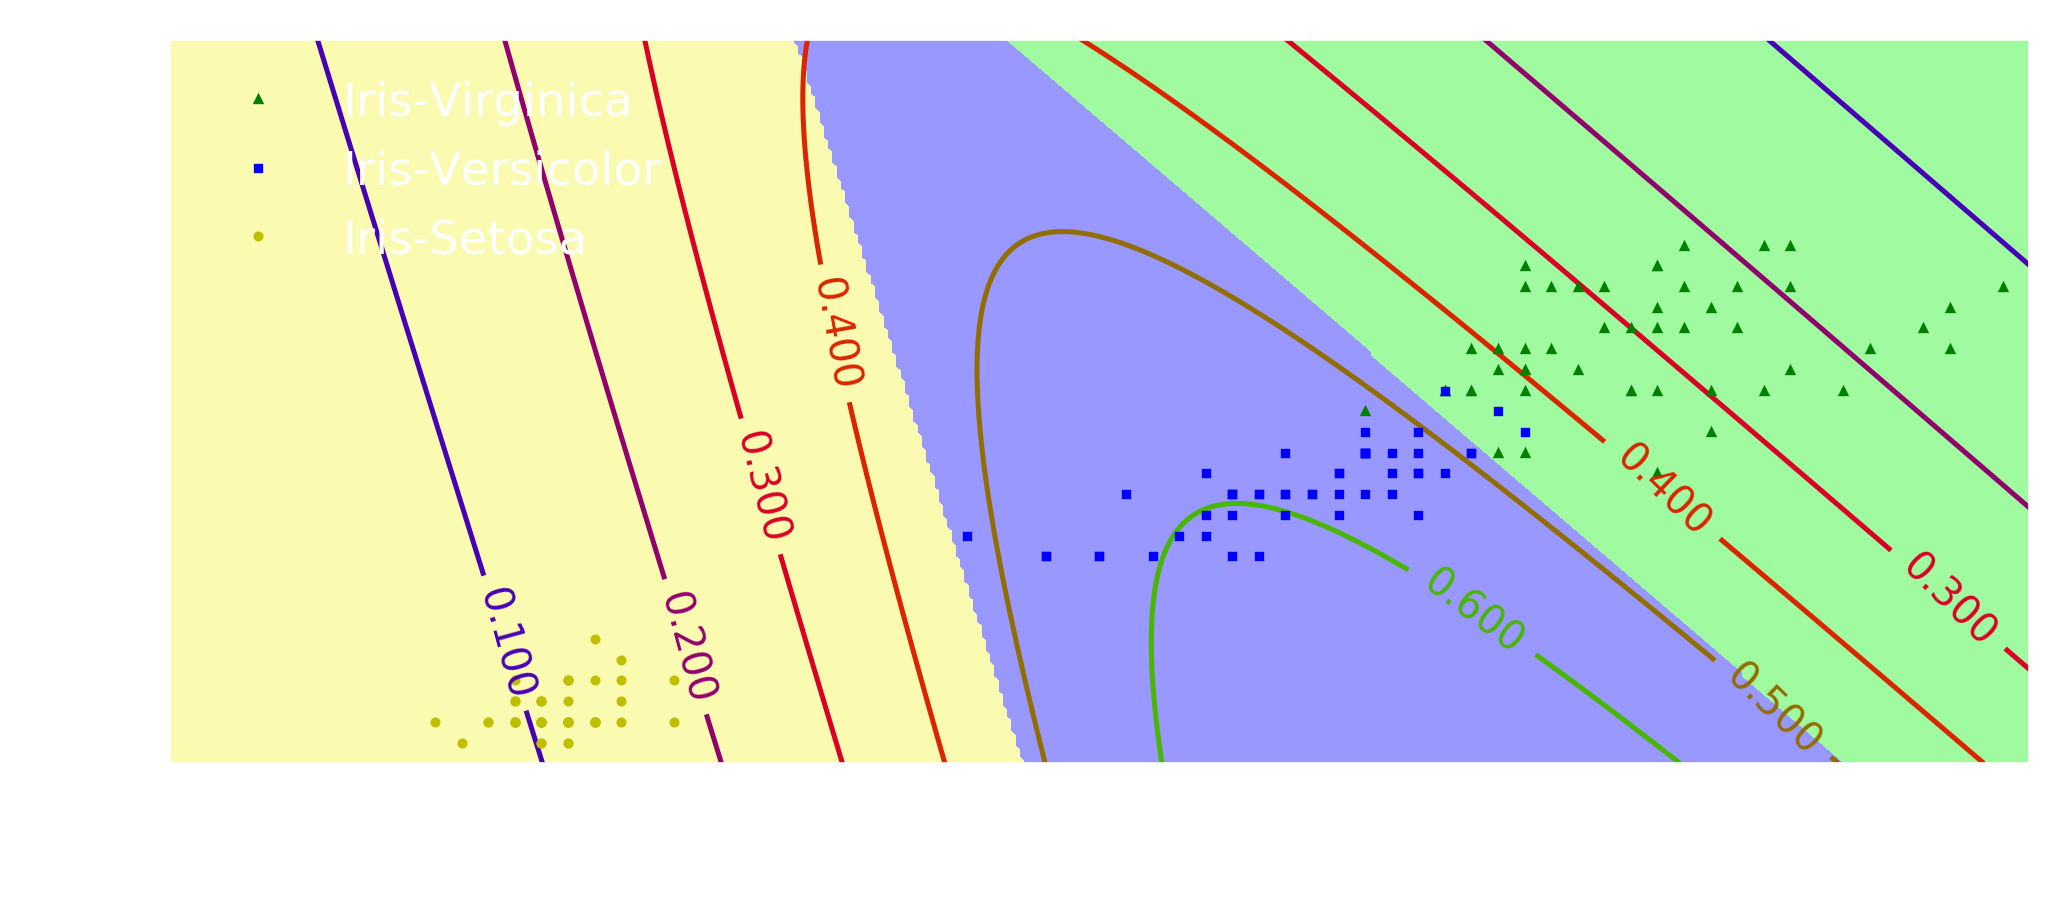

In [108]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [109]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333